In [48]:
import pandas as pd
import numpy as np

## Standardising Data

In [49]:
# Function for standardising and unstandardising columns
def standardise_columns(df, cols):
    subset_df = df[cols]
    subset_df = 0.8 * ((subset_df - subset_df.min()) / (subset_df.max() - subset_df.min())) + 0.1
    return subset_df

def unstandardise_columns(df, cols, max_val, min_val):
    subset_df = df[cols]
    subset_df = ((subset_df - subset_df.min()) / 0.8) * (max_val - min_val) + min_val
    return subset_df

def standardise_value(x, max_val, min_val):
    return 0.8 * ((x - min_val)) / (max_val - min_val) + 0.1

def unstandardise_value(x, max_val, min_val):
    return ((x - 0.1) / 0.8) * (max_val - min_val) + min_val

## Reading Data

In [50]:
my_data = pd.read_excel("River-Data-Lagged.xlsx")
my_data.drop(["Unnamed: 0"], axis=1, inplace=True)
my_data.head(10)

,Date,Skelton MDF (Cumecs),Crakehill MDF (t-1),Skip Bridge MDF (t-1),Westwick MDF (t-1),Skelton MDF (t-1),Crakehill MDF (t-2),Skip Bridge MDF (t-2),Westwick MDF (t-2),Skelton MDF (t-2),...,Malham Tarn DRT (t-1),Snaizeholme DRT (t-1),Arkengarthdale DRT (t-2),East Cowton DRT (t-2),Malham Tarn DRT (t-2),Snaizeholme DRT (t-2),Arkengarthdale DRT (t-3),East Cowton DRT (t-3),Malham Tarn DRT (t-3),Snaizeholme DRT (t-3)
0,1993-01-04,23.47,9.46,4.124,8.057,23.60,9.95,4.239,8.622,24.86,...,0.8,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,4.0
1,1993-01-05,60.70,9.41,4.363,7.925,23.47,9.46,4.124,8.057,23.60,...,0.8,61.6,0.0,0.0,0.8,0.0,0.0,0.0,0.8,0.0
2,1993-01-06,98.01,26.30,11.962,58.704,60.70,9.41,4.363,7.925,23.47,...,33.6,111.2,2.4,24.8,0.8,61.6,0.0,0.0,0.8,0.0
3,1993-01-07,56.99,32.10,10.237,34.416,98.01,26.30,11.962,58.704,60.70,...,1.6,0.8,11.2,5.6,33.6,111.2,2.4,24.8,0.8,61.6
4,1993-01-08,56.66,19.30,7.254,22.263,56.99,32.10,10.237,34.416,98.01,...,17.6,36.0,0.0,0.0,1.6,0.8,11.2,5.6,33.6,111.2
5,1993-01-09,78.10,22.00,7.266,29.587,56.66,19.30,7.254,22.263,56.99,...,1.6,2.4,5.6,4.0,17.6,36.0,0.0,0.0,1.6,0.8
6,1993-01-10,125.70,35.50,8.153,60.253,78.10,22.00,7.266,29.587,56.66,...,55.2,104.8,1.6,0.0,1.6,2.4,5.6,4.0,17.6,36.0
7,1993-01-11,195.90,51.00,13.276,93.951,125.70,35.50,8.153,60.253,78.10,...,76.0,136.8,14.4,0.8,55.2,104.8,1.6,0.0,1.6,2.4
8,1993-01-12,125.40,65.50,25.561,69.503,195.90,51.00,13.276,93.951,125.70,...,12.0,28.0,20.8,2.4,76.0,136.8,14.4,0.8,55.2,104.8
9,1993-01-13,161.50,32.00,20.715,40.514,125.40,65.50,25.561,69.503,195.90,...,0.8,24.0,10.4,16.0,12.0,28.0,20.8,2.4,76.0,136.8


In [51]:
target_cols = ["Skelton MDF (Cumecs)"]
flow_cols = [col for col in my_data.columns if "MDF (t" in col]
rain_cols = [col for col in my_data.columns if "DRT" in col]

In [52]:
feature_cols = flow_cols[:4] + rain_cols[:4]
feature_cols

['Crakehill MDF (t-1)',
 'Skip Bridge MDF (t-1)',
 'Westwick MDF (t-1)',
 'Skelton MDF (t-1)',
 'Arkengarthdale DRT (t-1)',
 'East Cowton DRT (t-1)',
 'Malham Tarn DRT (t-1)',
 'Snaizeholme DRT (t-1)']

In [53]:
training_df = my_data[target_cols + feature_cols]
training_df.head(10)

,Skelton MDF (Cumecs),Crakehill MDF (t-1),Skip Bridge MDF (t-1),Westwick MDF (t-1),Skelton MDF (t-1),Arkengarthdale DRT (t-1),East Cowton DRT (t-1),Malham Tarn DRT (t-1),Snaizeholme DRT (t-1)
0,23.47,9.46,4.124,8.057,23.60,0.0,0.0,0.8,0.0
1,60.70,9.41,4.363,7.925,23.47,2.4,24.8,0.8,61.6
2,98.01,26.30,11.962,58.704,60.70,11.2,5.6,33.6,111.2
3,56.99,32.10,10.237,34.416,98.01,0.0,0.0,1.6,0.8
4,56.66,19.30,7.254,22.263,56.99,5.6,4.0,17.6,36.0
5,78.10,22.00,7.266,29.587,56.66,1.6,0.0,1.6,2.4
6,125.70,35.50,8.153,60.253,78.10,14.4,0.8,55.2,104.8
7,195.90,51.00,13.276,93.951,125.70,20.8,2.4,76.0,136.8
8,125.40,65.50,25.561,69.503,195.90,10.4,16.0,12.0,28.0
9,161.50,32.00,20.715,40.514,125.40,7.2,4.0,0.8,24.0


In [54]:
std_training_df = standardise_columns(training_df, target_cols + feature_cols)
std_training_df.head(10)

,Skelton MDF (Cumecs),Crakehill MDF (t-1),Skip Bridge MDF (t-1),Westwick MDF (t-1),Skelton MDF (t-1),Arkengarthdale DRT (t-1),East Cowton DRT (t-1),Malham Tarn DRT (t-1),Snaizeholme DRT (t-1)
0,0.135600,0.127163,0.131519,0.113121,0.135834,0.100000,0.100000,0.102540,0.100000
1,0.202620,0.126980,0.133932,0.112837,0.135600,0.108526,0.219807,0.102540,0.283333
2,0.269783,0.188979,0.210648,0.222008,0.202620,0.139787,0.127053,0.206667,0.430952
3,0.195941,0.210269,0.193233,0.169791,0.269783,0.100000,0.100000,0.105079,0.102381
4,0.195347,0.163283,0.163118,0.143663,0.195941,0.119893,0.119324,0.155873,0.207143
5,0.233942,0.173194,0.163239,0.159409,0.195347,0.105684,0.100000,0.105079,0.107143
6,0.319630,0.222749,0.172194,0.225338,0.233942,0.151155,0.103865,0.275238,0.411905
7,0.446001,0.279646,0.223914,0.297786,0.319630,0.173890,0.111594,0.341270,0.507143
8,0.319090,0.332871,0.347939,0.245225,0.446001,0.136945,0.177295,0.138095,0.183333
9,0.384075,0.209902,0.299016,0.182901,0.319090,0.125577,0.119324,0.102540,0.171429


## Basic ANN Classes

In [55]:
from sklearn.metrics import *

In [56]:
min_val = training_df[target_cols].min()[0]
max_val = training_df[target_cols].max()[0]

features = std_training_df[feature_cols]
targets = std_training_df[target_cols]

In [210]:
class MultiLayerAnn:
    def __init__(self, layers, func_name="sigmoid"):
        self.layers = layers
        self.num_layers = len(layers)
        self.func_name = func_name
        
        weight_shapes = [(layers[i-1],layers[i]) for i in range(1, len(layers))]
        self.weights = {
            f"W{i+1}": np.random.standard_normal(s)/s[0]**0.5 
            for i, s in enumerate(weight_shapes) 
        }
        self.biases = {
            f"B{i+1}": np.random.randn(l,1)/l**0.5 
            for i, l in enumerate(layers[1:])
        }
    
    def activation(self, x):
        if self.func_name == "sigmoid":
            return 1/(1+np.exp(-x))
        elif self.func_name == "tanh":
            return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
        elif self.func_name == "relu":
            return x * (x > 0)
        elif self.func_name == "linear":
            return x
    
    def activation_deriv(self, a):
        if self.func_name == "sigmoid":
            return a * (1 - a)
        elif self.func_name == "tanh":
            return 1 - a**2
        elif self.func_name == "relu":
            return 1 * (a > 0)
        elif self.func_name == "linear":
            return np.ones(a.shape)
    
    def train(self, features, targets, epochs=1000, learning_rate=0.1):
        results = pd.DataFrame()
        real_targets = unstandardise_value(targets, max_val, min_val)
        num_targets = len(targets)
        
        for _ in range(epochs):
            # Forward pass
            activations = self.forward_pass(features)

            # Error calculation
            output_layer = activations[f"A{self.num_layers - 1}"]
            real_preds = unstandardise_value(output_layer, max_val, min_val)
            results = results.append({
                "mse": mean_squared_error(real_targets, real_preds),
                "st_mse": mean_squared_error(targets, output_layer),
                "mae": mean_absolute_error(real_targets, real_preds), 
                "st_mae": mean_absolute_error(targets, output_layer)
            }, ignore_index=True)

            # Backward pass
            deltas = self.compute_deltas(activations, targets, output_layer)
            self.update_weights(deltas, activations, features, num_targets, learning_rate)
        
        return results
    
    def forward_pass(self, features):
        activation = self.activation(np.dot(features, self.weights["W1"]) + self.biases["B1"].T)
        activations = {"A1": activation}
        for i in range(2, self.num_layers):
            activation = self.activation(np.dot(activation, self.weights[f"W{i}"]) + self.biases[f"B{i}"].T)
            activations[f"A{i}"] = activation
        
        return activations
    
    def compute_deltas(self, activations, targets, output_layer):
        ## Computing deltas
        output_err = targets - output_layer
        output_delta = output_err * self.activation_deriv(output_layer)
        deltas = {"dw1": output_delta}

        for i in range(self.num_layers - 1, 1, -1):
            dw = deltas[f"dw{self.num_layers - i}"]
            act = activations[f"A{i-1}"]
            w = self.weights[f"W{i}"]
            deltas[f"dw{self.num_layers - i + 1}"] = np.dot(dw, w.T) * self.activation_deriv(act)
        
        return deltas
    
    def update_weights(self, deltas, activations, features, num_targets, l_rate):
        ## Updating weights and biases
        delta = deltas[f"dw{self.num_layers - 1}"]
        self.weights["W1"] += l_rate * (np.dot(features.T, delta)) / num_targets
        self.biases["B1"] += l_rate * (np.dot(delta.T, np.ones((num_targets, 1)))) / num_targets

        for i in range(2, self.num_layers):
            act = activations[f"A{i-1}"]
            dw = deltas[f"dw{self.num_layers - i}"]
            self.weights[f"W{i}"] += l_rate * (np.dot(act.T, dw)) / num_targets
            self.biases[f"B{i}"] += l_rate * np.dot(dw.T, np.ones((num_targets, 1))) / num_targets
        

In [211]:
my_Ann = MultiLayerAnn((8,3,1), "sigmoid")
results = my_Ann.train(features.to_numpy(), targets.to_numpy())

In [212]:
results

,mae,mse,st_mae,st_mse
0,169.945580,31188.518562,0.305929,0.101068
1,167.852555,30458.380628,0.302161,0.098702
2,165.795178,29748.445565,0.298457,0.096402
3,163.779953,29058.274220,0.294829,0.094165
4,161.798435,28387.422396,0.291262,0.091991
...,...,...,...,...
995,40.348097,3228.826113,0.072633,0.010463
996,40.346974,3228.784407,0.072631,0.010463
997,40.345854,3228.742722,0.072629,0.010463
998,40.344739,3228.701057,0.072627,0.010463


mae         40.343628
mse       3228.659412
st_mae       0.072625
st_mse       0.010463
Name: 999, dtype: float64


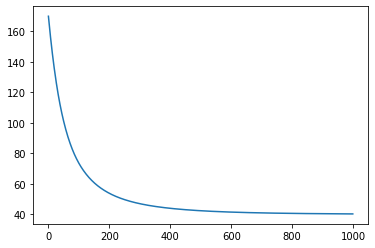

In [213]:
print(results.iloc[-1])
results.mae.plot()